### Importing the relevant libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [171]:
data = pd.read_csv(r"C:\Users\hp\Documents\Diabetes Project\diabetes_prediction_dataset.csv")

In [172]:
data.head()

,Gender,Age,Hypertension,Heart_disease,Smoking_history,BMI,HbA1c_level,Blood_glucose_level,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Exploratory Data Analysis

In [174]:
data.shape

(100000, 9)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               100000 non-null  object 
 1   Age                  100000 non-null  float64
 2   Hypertension         100000 non-null  int64  
 3   Heart_disease        100000 non-null  int64  
 4   Smoking_history      100000 non-null  object 
 5   BMI                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   Blood_glucose_level  100000 non-null  int64  
 8   Diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [176]:
data.describe()

,Age,Hypertension,Heart_disease,BMI,HbA1c_level,Blood_glucose_level,Diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [177]:
# List of categorical columns to analyze
categorical_columns = ['Gender', 'Hypertension', 'Heart_disease', 'Smoking_history', 'Diabetes']

# Calculate frequency counts and percentages
for column in categorical_columns:
    frequency_counts = data[column].value_counts()
    percentages = data[column].value_counts(normalize=True) * 100
    
    print(f"Frequency counts for {column}:\n{frequency_counts}\n")
    print(f"Percentages for {column}:\n{percentages}\n")


Frequency counts for Gender:
Gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Percentages for Gender:
Gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64

Frequency counts for Hypertension:
Hypertension
0    92515
1     7485
Name: count, dtype: int64

Percentages for Hypertension:
Hypertension
0    92.515
1     7.485
Name: proportion, dtype: float64

Frequency counts for Heart_disease:
Heart_disease
0    96058
1     3942
Name: count, dtype: int64

Percentages for Heart_disease:
Heart_disease
0    96.058
1     3.942
Name: proportion, dtype: float64

Frequency counts for Smoking_history:
Smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Percentages for Smoking_history:
Smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever   

### Data Preprocessing

### Handling Missing Data

In [180]:
data.isnull().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_disease          0
Smoking_history        0
BMI                    0
HbA1c_level            0
Blood_glucose_level    0
Diabetes               0
dtype: int64

### Outlier Detection

In [182]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in numeric columns
outliers_age = detect_outliers_iqr(data, 'Age')
outliers_bmi = detect_outliers_iqr(data, 'BMI')
outliers_hba1c = detect_outliers_iqr(data, 'HbA1c_level')
outliers_glucose = detect_outliers_iqr(data, 'Blood_glucose_level')

# Print the number of outliers detected
print(f"Outliers in Age: {len(outliers_age)}")
print(f"Outliers in BMI: {len(outliers_bmi)}")
print(f"Outliers in HbA1c_level: {len(outliers_hba1c)}")
print(f"Outliers in Blood_glucose_level: {len(outliers_glucose)}")


Outliers in Age: 0
Outliers in BMI: 7086
Outliers in HbA1c_level: 1315
Outliers in Blood_glucose_level: 2038


### Data Transformation

In [185]:
# Checking for anomalies
data['Smoking_history'].value_counts()

Smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [186]:
data['Smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

### Encoding the Categorical Variables

In [188]:
from sklearn.preprocessing import LabelEncoder

# Binary encoding for 'Gender'
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Label encoding for 'Smoking_history'
label_encoder = LabelEncoder()
data['Smoking_history'] = label_encoder.fit_transform(data['Smoking_history'])

# Verify the changes
data.head()


,Gender,Age,Hypertension,Heart_disease,Smoking_history,BMI,HbA1c_level,Blood_glucose_level,Diabetes
0,1.0,80.0,0,1,4,25.19,6.6,140,0
1,1.0,54.0,0,0,0,27.32,6.6,80,0
2,0.0,28.0,0,0,4,27.32,5.7,158,0
3,1.0,36.0,0,0,1,23.45,5.0,155,0
4,0.0,76.0,1,1,1,20.14,4.8,155,0


In [189]:
## to compute the correlation matrix
corr_matrix = data.corr()
corr_matrix

,Gender,Age,Hypertension,Heart_disease,Smoking_history,BMI,HbA1c_level,Blood_glucose_level,Diabetes
Gender,1.000000,0.030369,-0.014381,-0.077886,0.078255,0.023023,-0.020044,-0.017196,-0.037623
Age,0.030369,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
Hypertension,-0.014381,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
Heart_disease,-0.077886,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
Smoking_history,0.078255,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
BMI,0.023023,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,-0.020044,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
Blood_glucose_level,-0.017196,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
Diabetes,-0.037623,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


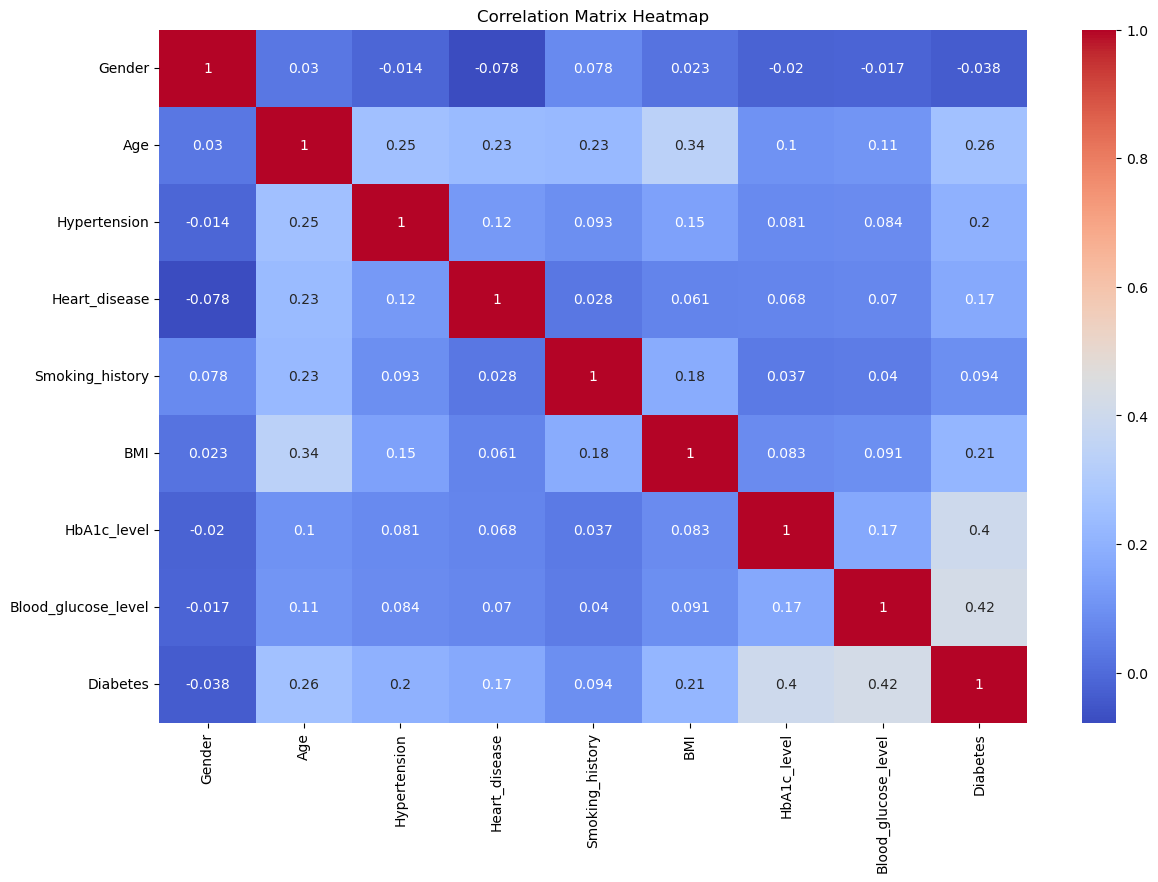

In [190]:
## to plot the correlation matrix in heatmap
corr_matrix = data.corr()
plt.figure(figsize=(14, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Feature Scaling using MinMaxScalar

In [192]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to scale
numeric_columns = ['Age', 'BMI', 'HbA1c_level', 'Blood_glucose_level']

# Initialize the MinMax scaler
scaler = MinMaxScaler()

# Apply scaling to the specified numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Verify the scaled data
print(data[numeric_columns].head())


        Age       BMI  HbA1c_level  Blood_glucose_level
0  1.000000  0.177171     0.563636             0.272727
1  0.674675  0.202031     0.563636             0.000000
2  0.349349  0.202031     0.400000             0.354545
3  0.449449  0.156863     0.272727             0.340909
4  0.949950  0.118231     0.236364             0.340909


### Visualization

In [194]:
data.dtypes

Gender                 float64
Age                    float64
Hypertension             int64
Heart_disease            int64
Smoking_history          int32
BMI                    float64
HbA1c_level            float64
Blood_glucose_level    float64
Diabetes                 int64
dtype: object

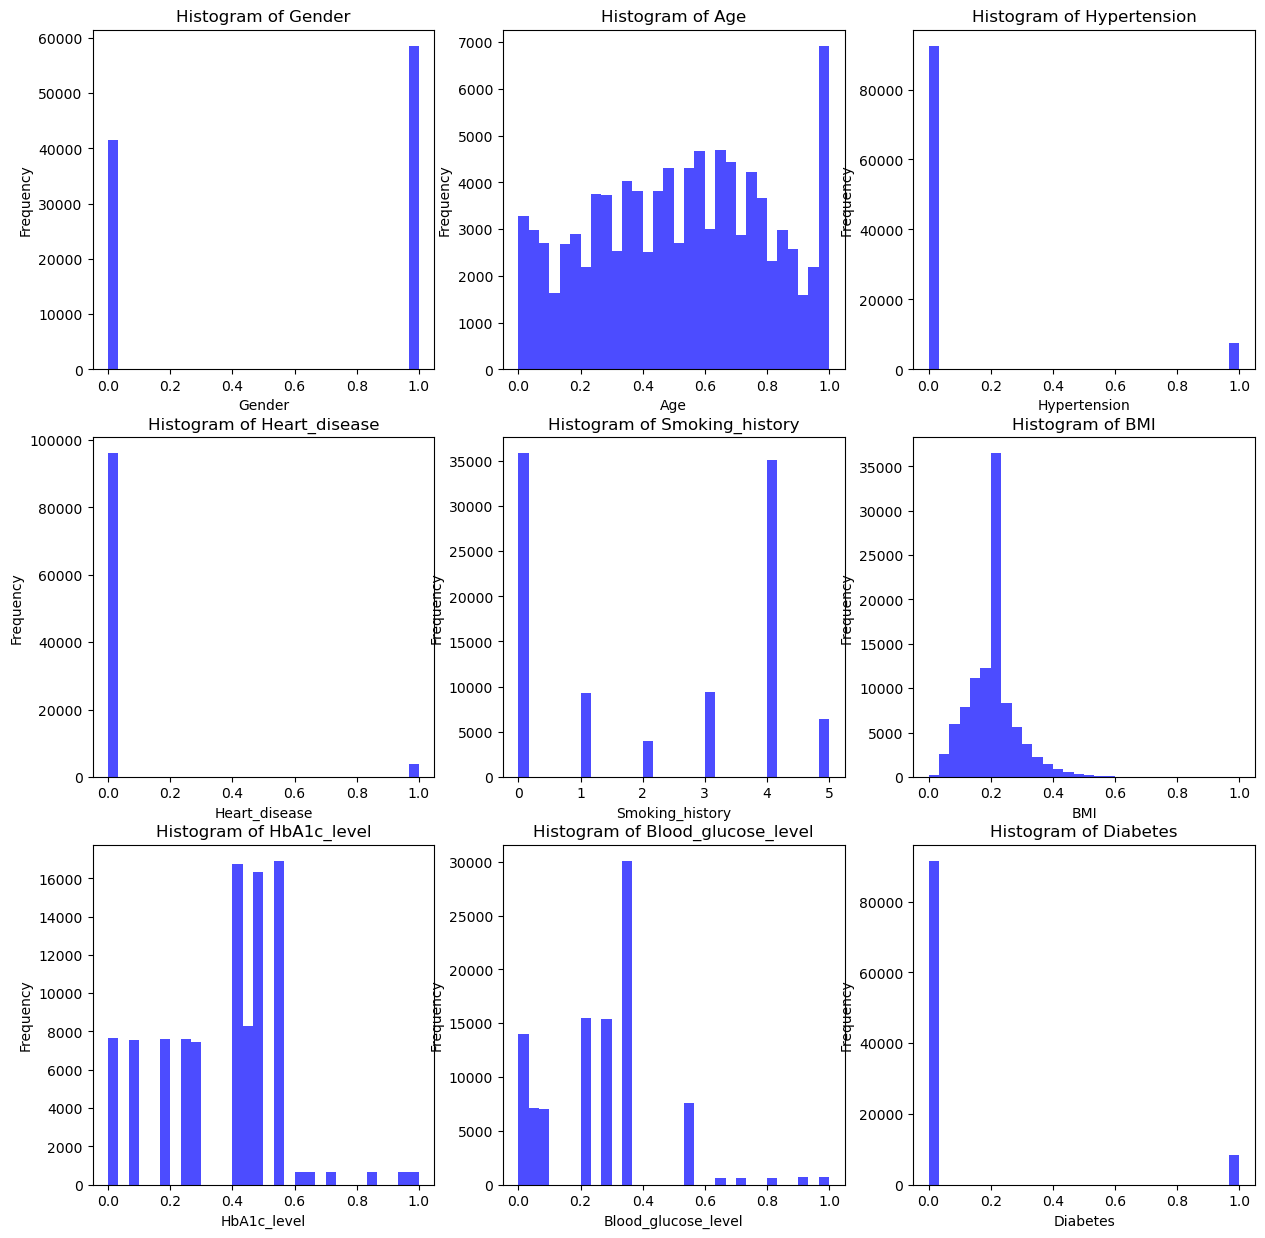

In [195]:
# Plotting the Histogram for numerical variables

num_cols = data.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    axes[i].hist(data[col], bins=30, alpha=0.7, color='blue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')



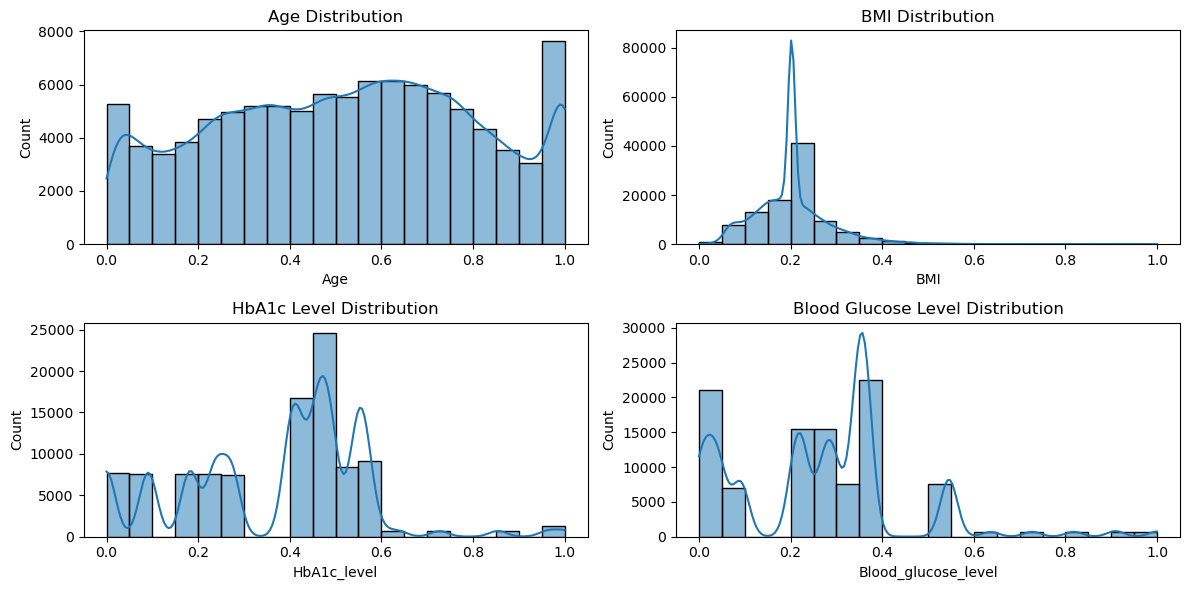

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# 1. Histograms for numeric features
# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')

# BMI distribution
plt.subplot(2, 2, 2)
sns.histplot(data['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')

# HbA1c level distribution
plt.subplot(2, 2, 3)
sns.histplot(data['HbA1c_level'], bins=20, kde=True)
plt.title('HbA1c Level Distribution')

# Blood glucose level distribution
plt.subplot(2, 2, 4)
sns.histplot(data['Blood_glucose_level'], bins=20, kde=True)
plt.title('Blood Glucose Level Distribution')

plt.tight_layout()
plt.show()



### Key Insights from the Chart

The distribution charts for Age, BMI, HbA1c, and Blood Glucose levels reveal distinct patterns. Age shows a relatively even distribution, while BMI exhibits a pronounced peak, indicating a concentration around certain values. HbA1c levels display multiple peaks, suggesting varied health statuses within the population. Blood Glucose levels also show significant variability, with several modes indicating potential health concerns. Overall, these distributions highlight important trends in health metrics that may inform healthcare strategies.


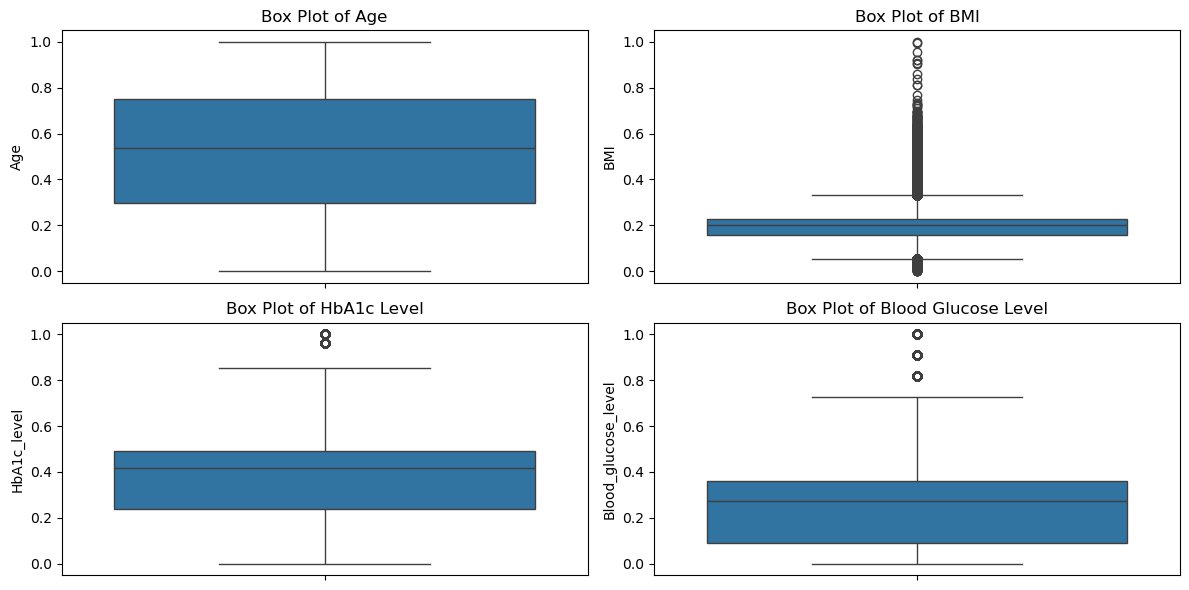

In [198]:
# 2. Box Plots to identify outliers
plt.figure(figsize=(12, 6))

# Age Box Plot
plt.subplot(2, 2, 1)
sns.boxplot(data['Age'])
plt.title('Box Plot of Age')

# BMI Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(data['BMI'])
plt.title('Box Plot of BMI')

# HbA1c Level Box Plot
plt.subplot(2, 2, 3)
sns.boxplot(data['HbA1c_level'])
plt.title('Box Plot of HbA1c Level')

# Blood Glucose Level Box Plot
plt.subplot(2, 2, 4)
sns.boxplot(data['Blood_glucose_level'])
plt.title('Box Plot of Blood Glucose Level')

plt.tight_layout()
plt.show()


### Key Insights from the Chart

The box plots reveal the central tendency and variability of Age, BMI, HbA1c, and Blood Glucose levels. Outliers indicate extreme values that may signal health risks, particularly in HbA1c and glucose metrics. Comparative analysis highlights differences in variability among the variables, guiding healthcare strategies and interventions for at-risk individuals.


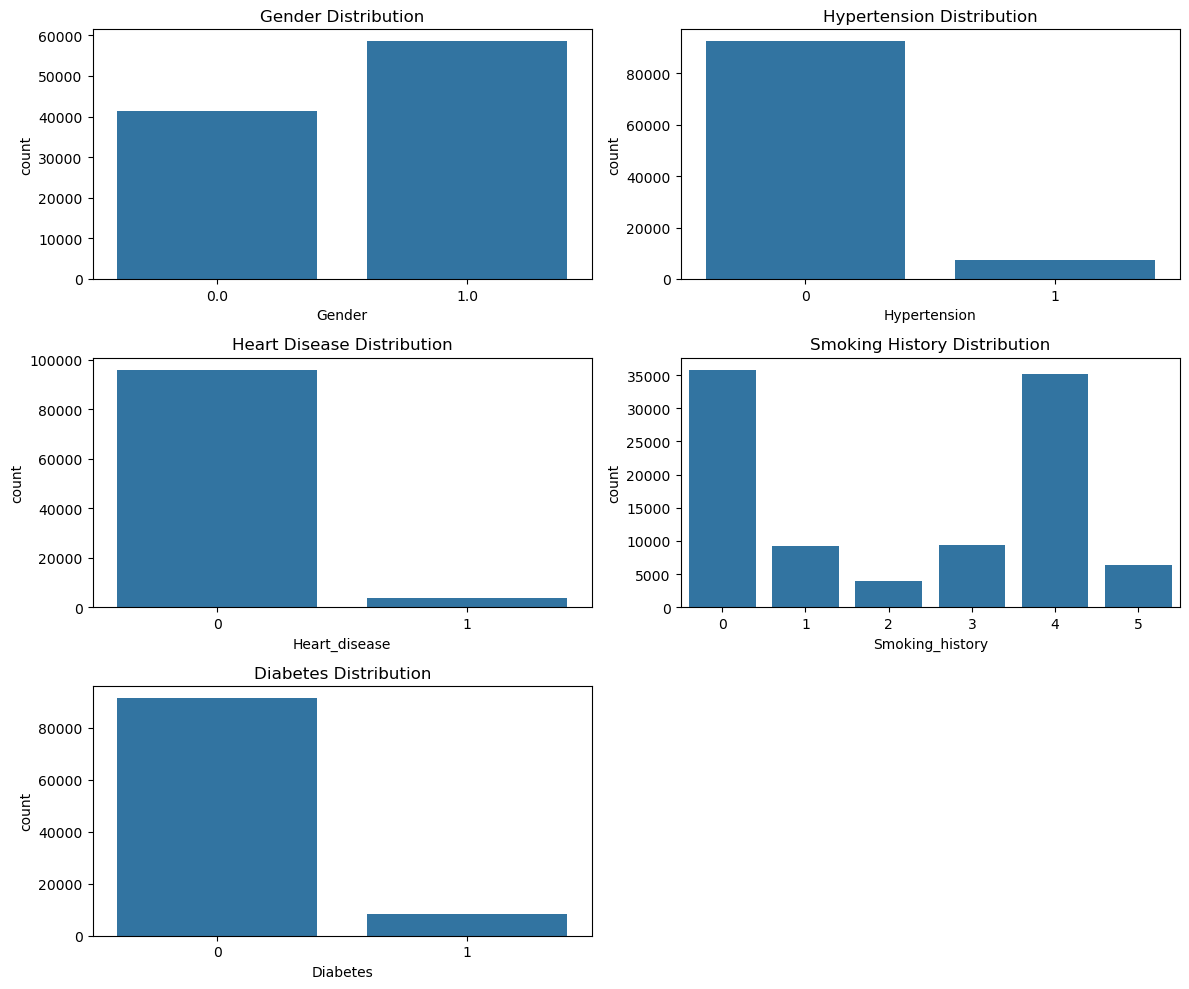

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# 1. Count Plot for 'Gender'
plt.subplot(3, 2, 1)
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')

# 2. Count Plot for 'Hypertension'
plt.subplot(3, 2, 2)
sns.countplot(data=data, x='Hypertension')
plt.title('Hypertension Distribution')

# 3. Count Plot for 'Heart_disease'
plt.subplot(3, 2, 3)
sns.countplot(data=data, x='Heart_disease')
plt.title('Heart Disease Distribution')

# 4. Count Plot for 'Smoking_history'
plt.subplot(3, 2, 4)
sns.countplot(data=data, x='Smoking_history')
plt.title('Smoking History Distribution')

# 5. Count Plot for 'Diabetes'
plt.subplot(3, 2, 5)
sns.countplot(data=data, x='Diabetes')
plt.title('Diabetes Distribution')

plt.tight_layout()
plt.show()


### Analysis of Imbalances and Patterns in the Chart

1. **Gender Distribution**:
   - The chart shows a relatively balanced distribution between genders, with a slight skew towards one gender.

2. **Hypertension Distribution**:
   - There is a clear imbalance, with a significant majority of individuals not having hypertension (0) compared to those who do (1), indicating that hypertension is less common in this population.

3. **Heart Disease Distribution**:
   - Similar to hypertension, there is a strong imbalance, with most individuals not having heart disease (0) and very few having it (1), suggesting a low prevalence of heart disease.

4. **Diabetes Distribution**:
   - This distribution mirrors the heart disease and hypertension patterns, showing a large majority without diabetes (0) and significantly fewer individuals with diabetes (1).

5. **Smoking History Distribution**:
   - This chart shows more variability across several categories (0 to 5), with higher counts in certain categories (especially 4), indicating a notable portion of the population has a significant smoking history.

### Summary
Overall, the data indicates significant imbalances in the prevalence of hypertension, heart disease, and diabetes, with most individuals not affected by these conditions. In contrast, smoking history shows more diversity, suggesting varying lifestyle choices within the population. These patterns could inform public health initiatives and resource allocation.


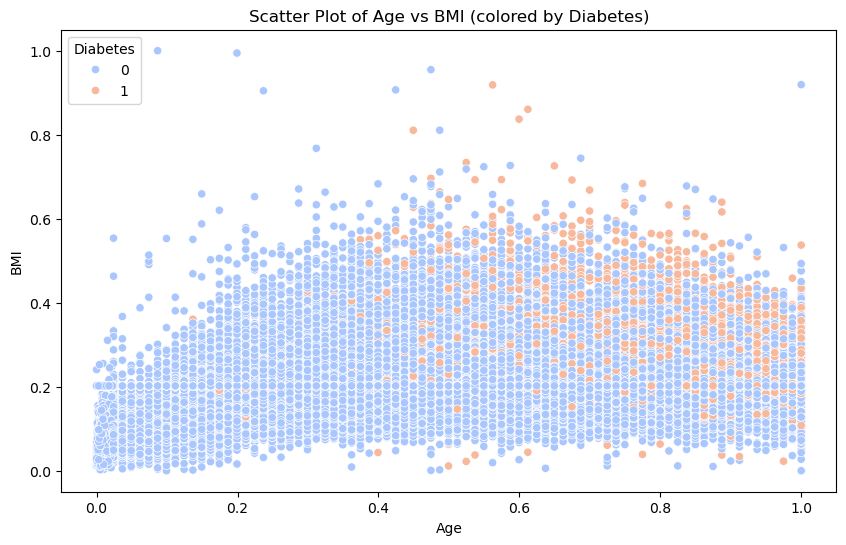

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Age vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='BMI', hue='Diabetes', palette='coolwarm')
plt.title('Scatter Plot of Age vs BMI (colored by Diabetes)')
plt.show()


### Summary of Scatter Plot Analysis: Age vs. BMI (Colored by Diabetes)

The scatter plot of Age vs. BMI, colored by diabetes status, shows that most individuals are non-diabetic (blue points), with a notable presence of diabetics (orange points) primarily in the higher BMI range. This suggests a correlation between higher BMI and increased diabetes prevalence. Age does not appear to significantly influence diabetes status in this dataset. Overall, the findings highlight the importance of addressing obesity in diabetes prevention efforts.


### Correlation Matrix and Heatmap

In [205]:
# 1. Calculate the correlation matrix
correlation_matrix = data[['Age', 'BMI', 'HbA1c_level', 'Blood_glucose_level']].corr()
correlation_matrix

,Age,BMI,HbA1c_level,Blood_glucose_level
Age,1.000000,0.337396,0.101354,0.110672
BMI,0.337396,1.000000,0.082997,0.091261
HbA1c_level,0.101354,0.082997,1.000000,0.166733
Blood_glucose_level,0.110672,0.091261,0.166733,1.000000


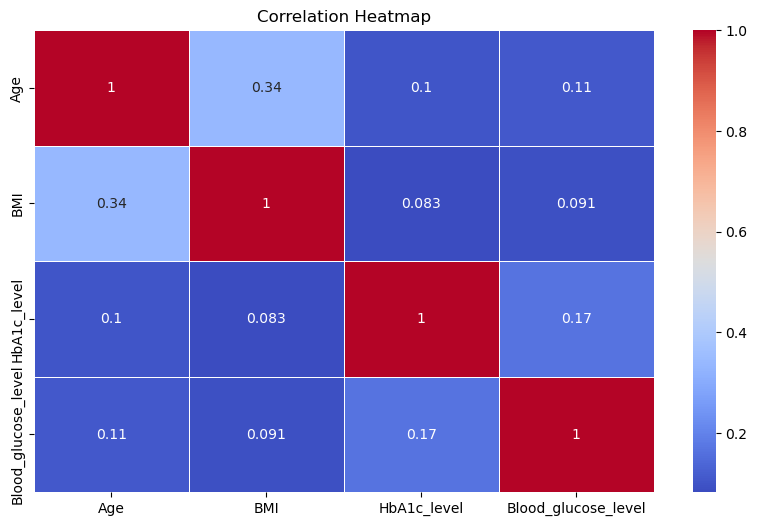

In [206]:
# 2. Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Key Insights from the Correlation Heatmap

1. **Moderate Correlation**: There is a moderate positive correlation (0.38) between Age and BMI, suggesting that older individuals tend to have higher BMI.

2. **Weak Correlations**: The relationships between BMI and HbA1c level (0.078), as well as between Age and Blood Glucose Level (0.1), are weak, indicating minimal direct association.

3. **HbA1c and Blood Glucose**: A moderate positive correlation (0.15) exists between HbA1c level and Blood Glucose level, suggesting that higher HbA1c is associated with higher blood glucose levels.

These insights highlight the importance of monitoring BMI with age and the relationship between HbA1c and blood glucose for better health management.


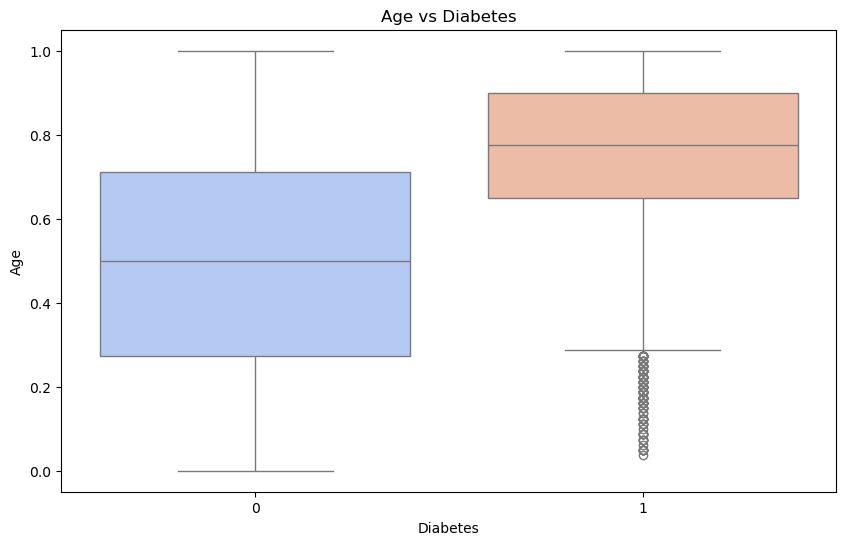

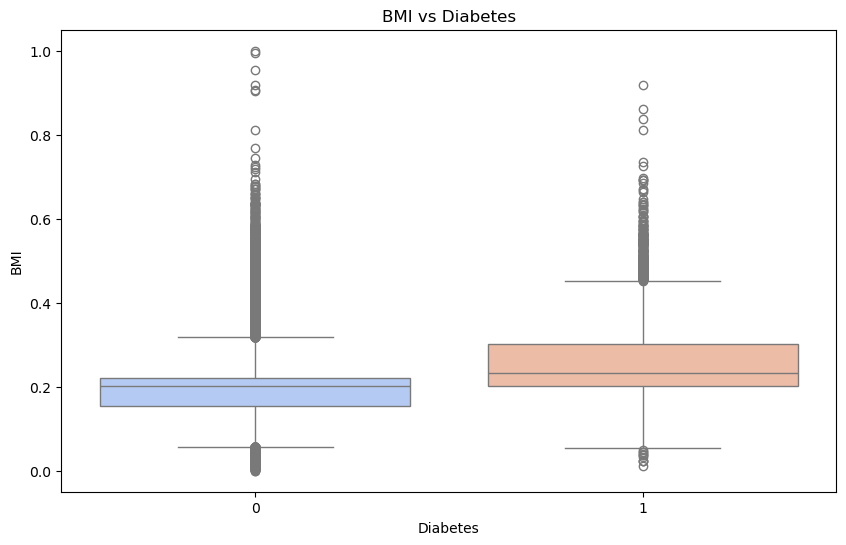

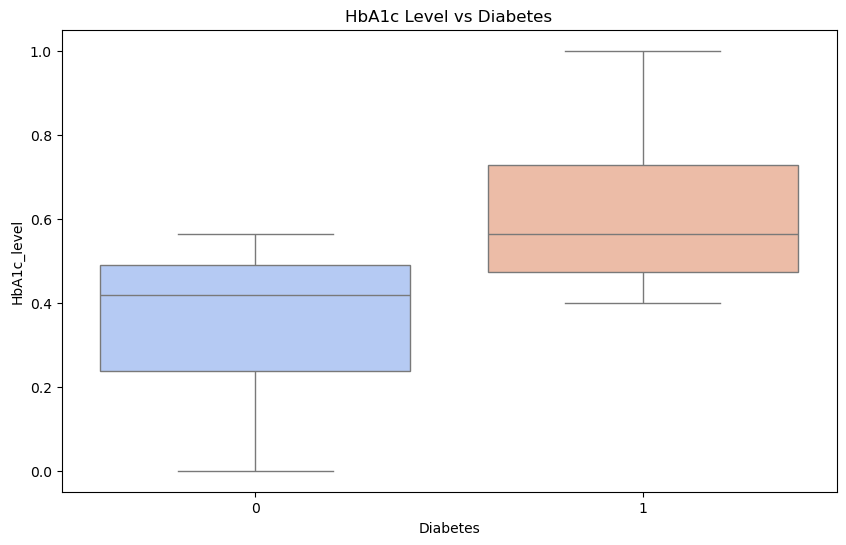

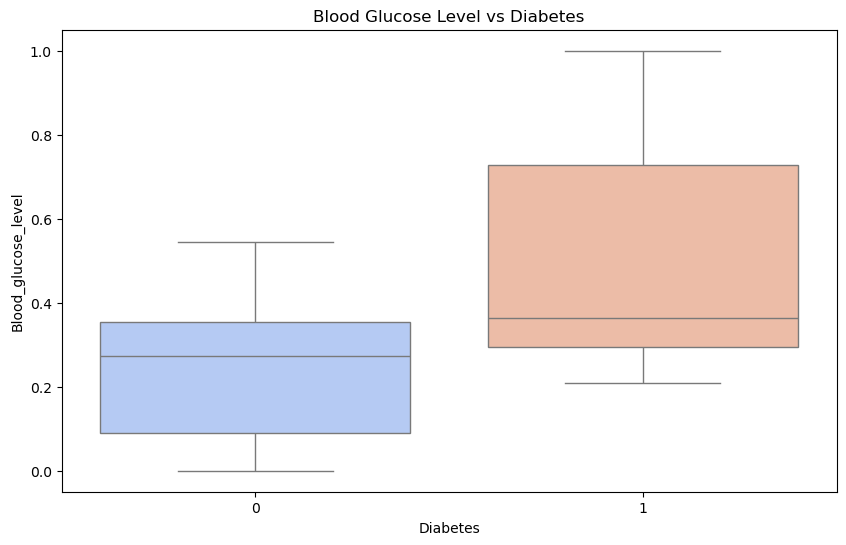

In [208]:
# 1. Grouped Box Plot for Age vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Diabetes', y='Age', palette='coolwarm')
plt.title('Age vs Diabetes')
plt.show()

# 2. Grouped Box Plot for BMI vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Diabetes', y='BMI', palette='coolwarm')
plt.title('BMI vs Diabetes')
plt.show()

# 3. Grouped Box Plot for HbA1c Level vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Diabetes', y='HbA1c_level', palette='coolwarm')
plt.title('HbA1c Level vs Diabetes')
plt.show()

# 4. Grouped Box Plot for Blood Glucose Level vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Diabetes', y='Blood_glucose_level', palette='coolwarm')
plt.title('Blood Glucose Level vs Diabetes')
plt.show()


### Key Insights from the Boxplot of Age vs. Diabetes

The boxplot illustrates the distribution of age for individuals with and without diabetes. Those with diabetes (1) tend to have a lower median age compared to those without diabetes (0). The range and interquartile range (IQR) for the diabetes group are also narrower, indicating less variability in age among diabetic individuals. Additionally, there are some outliers in the diabetes group, suggesting that while most individuals are younger, there are exceptions with significantly higher ages. Overall, this suggests a potential trend of younger ages being more prevalent among those diagnosed with diabetes.

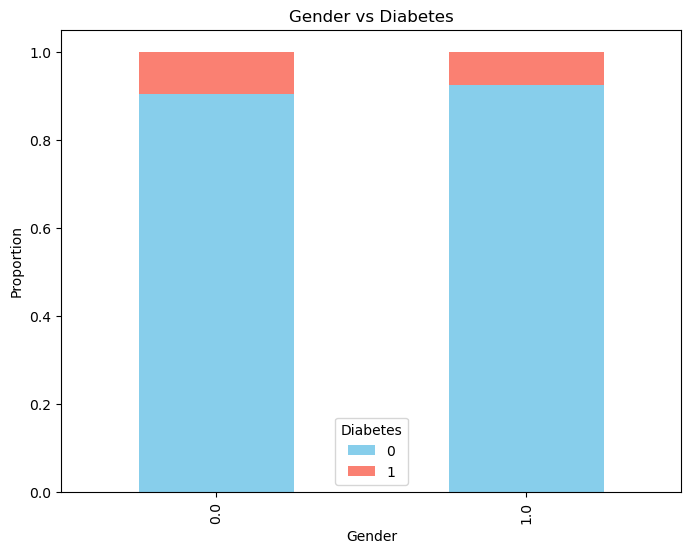

In [210]:
# Using Stacked Bar for chart
# 1. Stacked Bar Chart for Gender vs. Diabetes
gender_vs_diabetes = pd.crosstab(data['Gender'], data['Diabetes'], normalize='index')
gender_vs_diabetes.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Gender vs Diabetes')
plt.ylabel('Proportion')
plt.show()


### Key Insights from Gender vs. Diabetes

1. **Overall Proportions**: The chart indicates that a larger proportion of individuals across all gender categories (Female, Male, Other) are non-diabetic compared to those who are diabetic.

2. **Low Diabetes Prevalence**: The prevalence of diabetes appears low across genders, with no significant difference in proportions between them.

3. **Gender Representation**: The data suggests that diabetes does not discriminate significantly between genders in this dataset, as the proportions remain consistent.

These insights highlight the need for further investigation into other factors that may influence diabetes prevalence beyond gender.


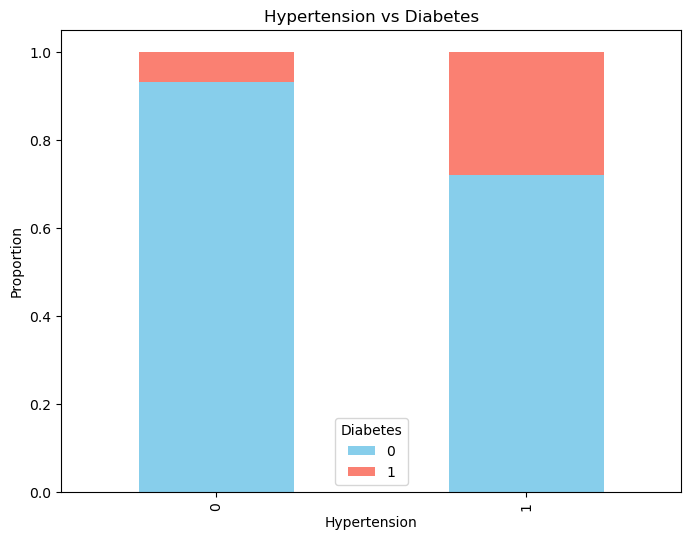

In [212]:
# 2. Stacked Bar Chart for Hypertension vs. Diabetes
hypertension_vs_diabetes = pd.crosstab(data['Hypertension'], data['Diabetes'], normalize='index')
hypertension_vs_diabetes.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Hypertension vs Diabetes')
plt.ylabel('Proportion')
plt.show()


### Key Insights from Hypertension vs. Diabetes

1. **Increased Prevalence**: The chart indicates that individuals with hypertension have a higher proportion of diabetes compared to those without hypertension.

2. **Lower Risk in Non-Hypertensive Group**: Non-hypertensive individuals show a significantly lower prevalence of diabetes, suggesting a potential protective effect against diabetes.

3. **Need for Further Research**: The observed correlation between hypertension and diabetes highlights the importance of exploring the underlying factors linking these conditions, which could inform prevention and treatment strategies.

These insights underscore the need for healthcare professionals to monitor blood pressure and diabetes together, especially in populations at risk.


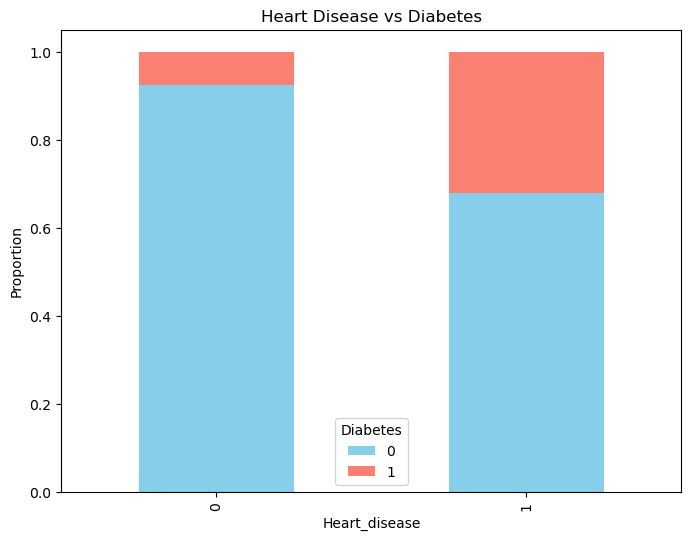

In [214]:
# 3. Stacked Bar Chart for Heart Disease vs. Diabetes
heart_disease_vs_diabetes = pd.crosstab(data['Heart_disease'], data['Diabetes'], normalize='index')
heart_disease_vs_diabetes.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Heart Disease vs Diabetes')
plt.ylabel('Proportion')
plt.show()



### Key Insights from Heart Disease vs. Diabetes

1. **Increased Diabetes Prevalence**: The chart indicates that individuals with heart disease have a higher proportion of diabetes compared to those without heart disease.

2. **Decreased Risk in Non-Heart Disease Group**: The non-heart disease individuals show a significantly lower prevalence of diabetes, implying a potential protective effect.

3. **Need for Comprehensive Monitoring**: The observed relationship between heart disease and diabetes highlights the necessity for healthcare providers to consider both conditions when assessing patient health, as they may influence each other.

These insights can guide preventive measures and treatment strategies for individuals at risk of either condition.


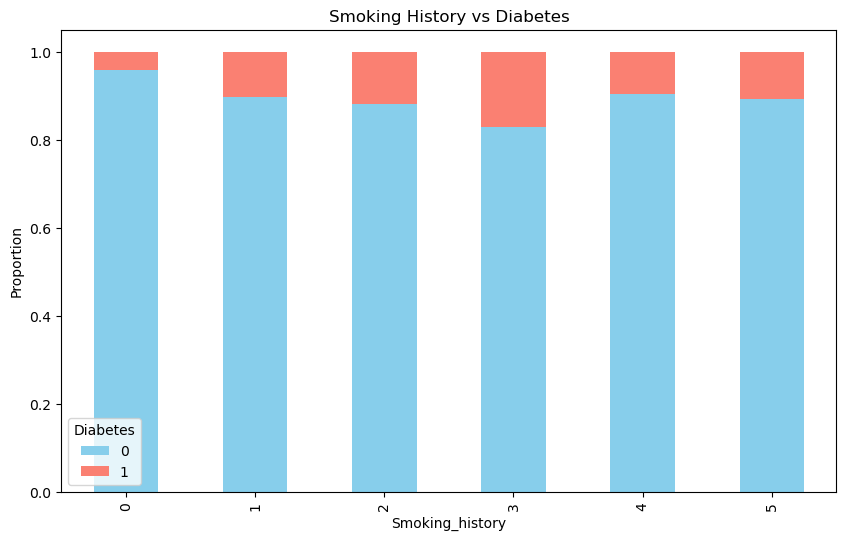

In [216]:
# 4. Stacked Bar Chart for Smoking History vs. Diabetes
smoking_history_vs_diabetes = pd.crosstab(data['Smoking_history'], data['Diabetes'], normalize='index')
smoking_history_vs_diabetes.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Smoking History vs Diabetes')
plt.ylabel('Proportion')
plt.show()

### Key Insights from Smoking History vs. Diabetes

1. **Stable Diabetes Rates**: The chart indicates that the proportion of individuals with diabetes is consistently low across all smoking history categories, suggesting that smoking may not be a significant risk factor for diabetes in this dataset.

2. **Dominance of Non-Diabetic Individuals**: In every category, the majority of individuals are non-diabetic, highlighting that diabetes is less prevalent compared to non-diabetes across various smoking histories.

3. **Need for Broader Analysis**: The lack of significant variation in diabetes prevalence across smoking categories indicates that other lifestyle and genetic factors may be more critical in influencing diabetes risk.

These insights emphasize the importance of considering a comprehensive range of risk factors when assessing diabetes risk, rather than focusing solely on smoking history.


### Feature Selection

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

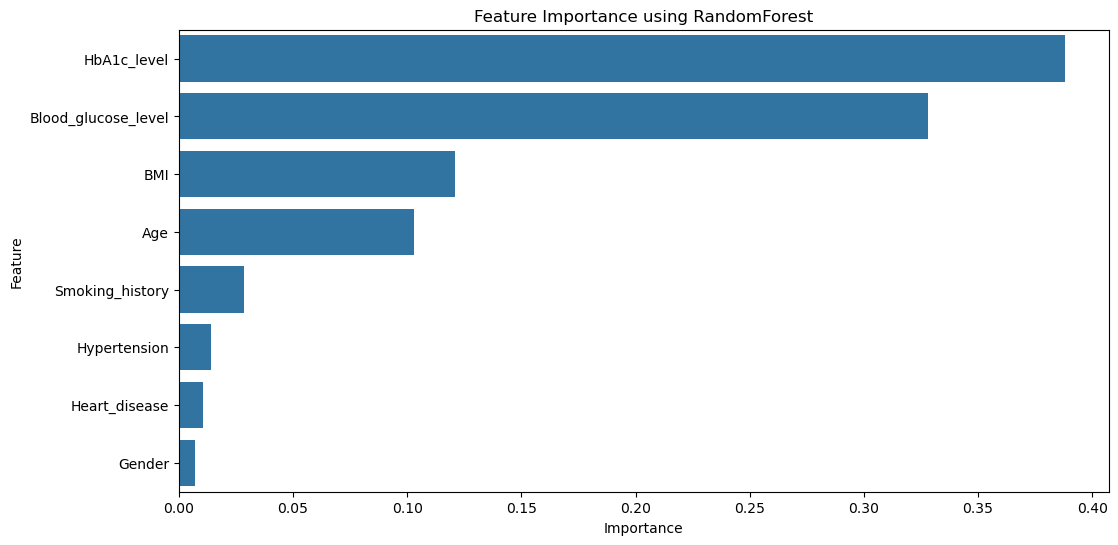

In [221]:
# Getting feature importance from the trained RandomForest model
feature_importance = rf.feature_importances_

# Create a DataFrame for feature importance using the columns from the encoded dataset (X)
importance_data = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by feature importance
importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_data)
plt.title('Feature Importance using RandomForest')
plt.show()


In [222]:
print(importance_data.head(5))

               Feature  Importance
6          HbA1c_level    0.387881
7  Blood_glucose_level    0.327850
5                  BMI    0.121032
1                  Age    0.102900
4      Smoking_history    0.028466


In [223]:
data.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart_disease', 'Smoking_history',
       'BMI', 'HbA1c_level', 'Blood_glucose_level', 'Diabetes'],
      dtype='object')

In [224]:
# Select the target variable y
y = data['Diabetes']

# Drop the target variable and create the independent variables
X = data.drop(['Diabetes'],axis=1)

In [225]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Diabetes, dtype: int64

In [226]:
X.head()

,Gender,Age,Hypertension,Heart_disease,Smoking_history,BMI,HbA1c_level,Blood_glucose_level
0,1.0,1.000000,0,1,4,0.177171,0.563636,0.272727
1,1.0,0.674675,0,0,0,0.202031,0.563636,0.000000
2,0.0,0.349349,0,0,4,0.202031,0.400000,0.354545
3,1.0,0.449449,0,0,1,0.156863,0.272727,0.340909
4,0.0,0.949950,1,1,1,0.118231,0.236364,0.340909


### SMOTE (Synthetic Minority Over-Sampling Technique)

In [228]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)

# To print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y_train)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 73208, 1: 6792})
Class distribution after resampling: Counter({0: 73208, 1: 73208})


### MinMax Scalar

In [230]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_imputed)

# You can also scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test_imputed)


### Fitting the Model

### Logistics Regression

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Instantiate the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Train the logistic regression model on the training data
logreg_model.fit(X_train_scaled, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'binary' for binary classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

# Make predictions using the test data
y_pred = logreg_model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the logistic regression is {accuracy} %')

# Calculate other metrics using the custom function
logreg_result = metrics_calculator(y_test, y_pred, 'Logistic Regression')

# Display the results
logreg_result


The accuracy of the logistic regression is 95.88499999999999 %


{'Model': 'Logistic Regression',
 'Accuracy': 0.95885,
 'Precision': 0.9176709007467257,
 'Recall': 0.7999474181774605,
 'F1 Score': 0.8470604180756783,
 'Confusion Matrix': array([[18138,   154],
        [  669,  1039]], dtype=int64)}

### Decision Tree

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree model on the training data
dt_model.fit(X_train_scaled, y_train)

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
}
    return results

# Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the Decision Tree is {accuracy} %')

# Example usage
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

The accuracy of the Decision Tree is 95.88499999999999 %


{'Model': 'dt_model',
 'Accuracy': 0.95885,
 'Precision': 0.8709136630343671,
 'Recall': 0.6083138173302107,
 'F1-Score': 0.7163047225094795}

### Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the SVM model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the SVM model on the training data
rf_model.fit(X_train_scaled, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multiple classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Make predictions using the test data
y_pred = rf_model.predict(X_test_scaled)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the Random Forest Model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
rf_result = metrics_calculator(y_test, y_pred, 'rf_model')

# Step 6: Display the results
rf_result


The accuracy of the Random Forest Model is 97.03 %


{'Model': 'rf_model',
 'Accuracy': 0.9703,
 'Precision': 0.9587733333333333,
 'Recall': 0.844159999303518,
 'F1-Score': 0.8915763948888455}

### Support Vectors Machines

In [239]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Instantiate the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Step 2: Train the SVM model on the training data
svm_model.fit(X_train_scaled, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multiple classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Make predictions using the test data
y_pred = svm_model.predict(X_test_scaled)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the SVM model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
svm_result = metrics_calculator(y_test, y_pred, 'SVM')

# Step 6: Display the results
svm_result


The accuracy of the SVM model is 95.91499999999999 %


{'Model': 'SVM',
 'Accuracy': 0.95915,
 'Precision': 0.9428738225554751,
 'Recall': 0.7817984314818011,
 'F1-Score': 0.84086319697598}

### Gradient Boostering Machines

In [241]:
# Import the necessary library
from xgboost import XGBClassifier

# Step 1: Instantiate the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Step 2: Train the XGBoost model on the training set (using Standard Scaled Data)
xgb_model.fit(X_train_scaled, y_train)

# Step 3: Predict on the validation set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for binary classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Predict on the validation set
y_pred = xgb_model.predict(X_test_scaled)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the XGBoost Model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
xgb_result = metrics_calculator(y_test, y_pred, 'XGBoost Model')

# Step 6: Display the results
xgb_result



The accuracy of the XGBoost Model is 97.155 %


{'Model': 'XGBoost Model',
 'Accuracy': 0.97155,
 'Precision': 0.965301342473334,
 'Recall': 0.8472320093861179,
 'F1-Score': 0.895912983034301}

### Saving the Models

In [248]:
# Saving the Model
import pickle
pickle_out = open('classifier.pkl', mode = 'wb')
pickle.dump(xgb_model, pickle_out)
pickle_out.close()

### Deploying the Model

In [261]:
import os
import pickle
import streamlit as st

# Print the current working directory
print("Current working directory:", os.getcwd())

# Loading the trained model
pickle_in = open(r"C:\Users\hp\Documents\Diabetes Project\classifier.pkl", 'rb')
classifier = pickle.load(pickle_in)

# Defining the function to make predictions using the user input
@st.cache()
def prediction(Gender, Age, Hypertension, Heart_disease, Smoking_history,
               BMI, HbA1c_level, Blood_glucose_level):
    
    # Convert categorical data
    gender_encoded = 1 if Gender == "Male" else 0
    smoking_mapping = {"Never": 0, "Former": 1, "Current": 2}
    smoking_encoded = smoking_mapping[Smoking_history]

    # Making Predictions (ensure that the order of input features matches your model training)
    prediction = classifier.predict([[gender_encoded, Age, Hypertension, Heart_disease, smoking_encoded,
                                      BMI, HbA1c_level, Blood_glucose_level]])

    if prediction == 0:
        pred = "Not Diabetes"
    else:
        pred = "Diabetes"

    return pred

# Main function to define the Streamlit web app
def main():
    # Front end elements of the web page
    html_temp = '''
    <div style='background-color: red; padding:13px'>
    <h1 style='color: black; text-align: center;'>Diabetes Prediction ML App</h1>
    </div>
    '''

    # Display the front end aspect
    st.markdown(html_temp, unsafe_allow_html=True)

    # Input Parameters
    st.header("Input Parameters")
    Age = st.number_input("Age", min_value=0, max_value=120, value=30)
    Gender = st.selectbox("Gender", ["Male", "Female"])
    Hypertension = st.selectbox("Hypertension", [0, 1], help="0: No, 1: Yes")
    Heart_disease = st.selectbox("Heart Disease", [0, 1], help="0: No, 1: Yes")
    Smoking_history = st.selectbox("Smoking History", ["Never", "Former", "Current"])
    BMI = st.number_input("BMI (Body Mass Index)", min_value=10.0, max_value=50.0, value=25.0)
    HbA1c_level = st.number_input("HbA1c Level", min_value=3.0, max_value=15.0, value=5.5)
    Blood_glucose_level = st.number_input("Blood Glucose Level", min_value=50, max_value=300, value=100)

    result = ""

    # When 'Predict' is clicked, make prediction and display the result
    if st.button("Predict"):
        result = prediction(Gender, Age, Hypertension, Heart_disease, Smoking_history,
                            BMI, HbA1c_level, Blood_glucose_level)
        st.success("Prediction: {}".format(result))

if __name__ == '__main__':
    main()


Current working directory: C:\Users\hp\Documents\Diabetes Project
